In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# **Clean Dataset**

In [8]:
df=df.rename(columns={'v1':'label','v2':'message'})

In [9]:
df=df[['label','message']]

In [10]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [12]:
df.isnull().sum()

label      0
message    0
dtype: int64

# **Visualization**

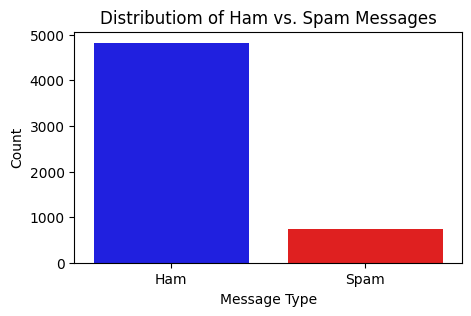

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['label'],hue=df['label'],palette=['blue','red'],legend=False)
plt.xticks(ticks=[0,1],labels=['Ham','Spam'])
plt.title("Distributiom of Ham vs. Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=42,stratify=df['label'])

In [15]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

# **Naive Bayes**

In [16]:
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)
y_pred_nb=nb_model.predict(X_test_tfidf)

In [17]:
print("\n=== Naive Bayes Report ===")
print("Accuracy:", accuracy_score(y_test,y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test,y_pred_nb))


=== Naive Bayes Report ===
Accuracy: 0.9721973094170404

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# **Logistic Regression**

In [18]:
lr_model=LogisticRegression()
lr_model.fit(X_train_tfidf,y_train)
y_pred_lr=lr_model.predict(X_test_tfidf)

In [19]:
print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test,y_pred_lr))


=== Logistic Regression Results ===
Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# **Support Vector Machine**

In [20]:
svm_model=SVC(kernel='linear',probability=True)
svm_model.fit(X_train_tfidf,y_train)
y_pred_svm=svm_model.predict(X_test_tfidf)

In [21]:
print("\n=== SVM Report ===")
print("Accuracy:", accuracy_score(y_test,y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test,y_pred_svm))


=== SVM Report ===
Accuracy: 0.9847533632286996

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# **Model Comparison**

In [22]:
models={"Naive Bayes":nb_model,"Logistic Regression":lr_model,"SVM":svm_model}
results={name:accuracy_score(y_test,model.predict(X_test_tfidf)) for name, model in models.items()}

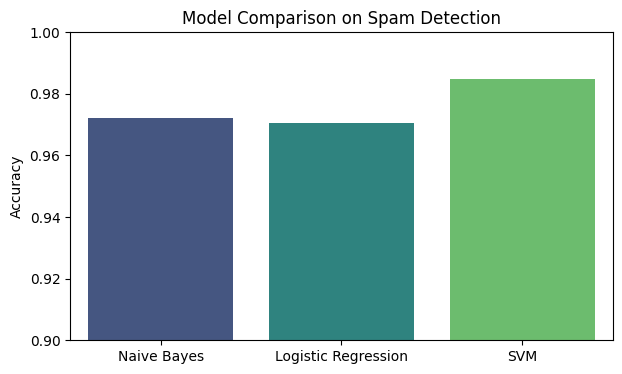

In [23]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(results.keys()),y=list(results.values()),hue=list(results.keys()),palette='viridis',legend=False)
plt.ylim(0.9,1.0)
plt.ylabel("Accuracy")
plt.title("Model Comparison on Spam Detection")
plt.show()

# **ROC Curve Comparison**

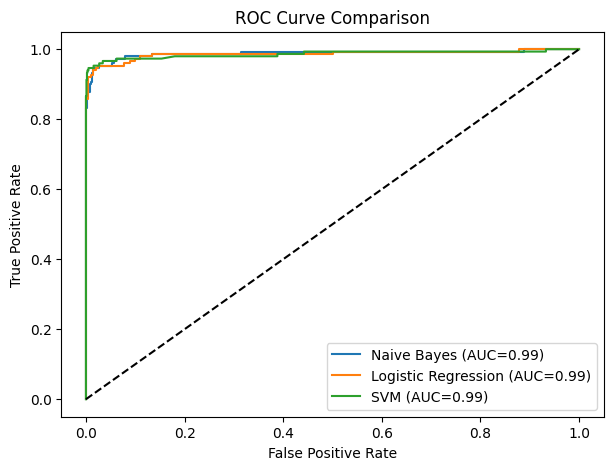

In [24]:
plt.figure(figsize=(7,5))
for name,model in models.items():
    y_prob=model.predict_proba(X_test_tfidf)[:,1] if hasattr(model,"predict_proba") else model.decision_function(X_test_tfidf)
    fpr,tpr,_=roc_curve(y_test,y_prob)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{name} (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()